# Set up

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import os
# TODO: change this to the path to your homework folder
#GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'MultiTaskLearning'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'codes/MultiTaskLearning'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

# Load the autoreload extension
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(GOOGLE_DRIVE_PATH)

In [ ]:
# import os
# # TODO: change this to the path to your homework folder
# #GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'MultiTaskLearning'
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'codes/MultiTaskLearning'
# GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
# print(os.listdir(GOOGLE_DRIVE_PATH))

In [ ]:
# # Load the autoreload extension
# %load_ext autoreload
# %autoreload 2

# import sys
# sys.path.append(GOOGLE_DRIVE_PATH)

# Run the codes

In [ ]:
from dataset import *
from fastai import *
from fastai.vision import *
from fastai.layers import MSELossFlat, CrossEntropyFlat
from torchvision import transforms
from model.Multitask import *
from train_multitask import *

Load the data

In [ ]:
df_train = maketable("/Features/BERT/sentence_embedding/", "train")
df_valid = maketable("/Features/BERT/sentence_embedding/", "dev")  # validation
df_test = maketable("/Features/BERT/sentence_embedding/", "test") 
# df_train['name']

In [ ]:
train_ds = MultiTaskDataset(df_train, "text")
# print(train_ds[2])
valid_ds = MultiTaskDataset(df_valid, "text")
test_ds = MultiTaskDataset(df_test,"text")
train_dl = DataLoader(train_ds, batch_size=5, shuffle=False, num_workers=2)
valid_dl = DataLoader(valid_ds, batch_size=5, shuffle=False, num_workers=2)
# train_dl = DataLoader(train_ds)
# valid_dl = DataLoader(valid_ds)
data = DataBunch(train_dl, valid_dl)

In [ ]:
# trainloader = DataLoader(FASHION_train, batch_size=batch_size, shuffle=True)
# valloader = DataLoader(FASHION_val, batch_size=batch_size, shuffle=True)
# testloader = DataLoader(FASHION_test, batch_size=batch_size, shuffle=True)

In [ ]:
tt=torch.load("drive/MyDrive/codes/MultiTaskLearning/Features/BERT/sentence_embedding/360_sentence_embedding.pt")

In [ ]:
# data.show_batch(2)

Train the model

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cpu


In [ ]:
model = MultiTaskModel( ps = 0.25)

Using the CPU. Overall speed may be slowed down


In [ ]:
model

MultiTaskModel(
  (fc1): Linear(in_features=768, out_features=512, bias=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.25, inplace=False)
  (fcL1): Linear(in_features=512, out_features=2, bias=True)
  (sigmoid): Sigmoid()
  (fc2): Linear(in_features=768, out_features=512, bias=True)
  (relu2): ReLU()
  (drop2): Dropout(p=0.25, inplace=False)
  (fcL2): Linear(in_features=512, out_features=25, bias=True)
)

In [ ]:
loss_func = MultiTaskLossWrapper(2).to(data.device)
metric = metrics()
learn = Learner(data, model, loss_func=loss_func, callback_fns=ShowGraph, metrics=metrics)
#learn.split([learn.model.encoder[:6],learn.model.encoder[6:],nn.ModuleList([learn.model.fc1, learn.model.fc2])])
#learn.freeze()

In [ ]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,metrics,time


torch.Size([5, 1, 768])
torch.Size([5, 768])
torch.Size([5, 512])
torch.Size([5, 512])
torch.Size([5, 512])
torch.Size([5, 2])
tensor([[0.4249, 0.5968],
        [0.4486, 0.6070],
        [0.4559, 0.5537],
        [0.4312, 0.5876],
        [0.4956, 0.5819]], grad_fn=<SigmoidBackward0>) tensor([0., 1., 0., 1., 1.], requires_grad=True)
ccc
True
True
sss
True
True
True
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


RuntimeError: ignored

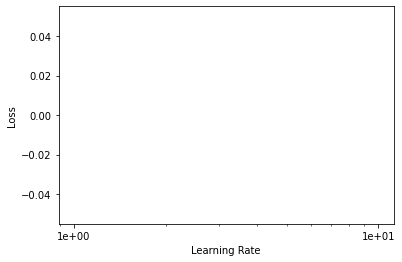

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(15,max_lr=1e-2,
                    callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='valid_loss', name='stage-1')])

In [ ]:

trn_loss_hist, trn_acc_hist, val_acc_hist = train(model, train_dl, valid_dl, 10)


Start training...
-----------------Epoch = 1-----------------


  0%|          | 0/22 [00:00<?, ?it/s]

torch.Size([5, 1, 768])
True
torch.Size([5, 768])
torch.Size([5, 512])
torch.Size([5, 512])
torch.Size([5, 512])
torch.Size([5, 2])
False
False
tensor([[0.5087, 0.4696],
        [0.4733, 0.4489],
        [0.4702, 0.4528],
        [0.4716, 0.4661],
        [0.5502, 0.4724]], grad_fn=<SigmoidBackward0>) tensor([0., 1., 0., 1., 1.], requires_grad=True)
ccc
True
True
sss
True
True
True
fff


AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
x = np.arange(10)
# train/val accuracies for MiniVGG
plt.figure()
plt.plot(x, trn_acc_hist)
plt.plot(x, val_acc_hist)
plt.legend(['Training', 'Validation'])
plt.xticks(x)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('fashion MNIST Classification')
plt.gcf().set_size_inches(10, 5)
plt.savefig('part1.png', dpi=300)
plt.show()

Learner(data=DataBunch;

Train: <dataset.MultiTaskDataset object at 0x7ff4bc2f9290>;

Valid: <dataset.MultiTaskDataset object at 0x7ff4bc2f9490>;

Test: None, model=MultiTaskModel(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): 